In [1]:
from galaxy import Galaxy
import matplotlib.pyplot as plt

In [2]:
basePath = f"/export/data/ucakir/TNG100/TNG100-1/output/"


In [3]:
import numpy as np

In [7]:
g = Galaxy(simulation="IllustrisTNG", halo_id=20, particle_type="stars", base_path=basePath, snapshot=99)

(array([2.000e+00, 1.000e+00, 4.000e+00, 4.000e+00, 6.000e+00, 6.000e+00,
        8.000e+00, 9.000e+00, 6.000e+00, 9.000e+00, 1.300e+01, 1.100e+01,
        1.000e+01, 1.400e+01, 7.300e+01, 1.930e+02, 3.600e+02, 5.310e+02,
        7.980e+02, 1.047e+03, 1.471e+03, 1.859e+03, 2.376e+03, 2.829e+03,
        3.382e+03, 4.006e+03, 4.367e+03, 4.883e+03, 5.335e+03, 5.769e+03,
        6.076e+03, 6.589e+03, 6.963e+03, 6.892e+03, 6.856e+03, 6.926e+03,
        6.938e+03, 6.735e+03, 6.526e+03, 6.239e+03, 6.137e+03, 5.770e+03,
        5.461e+03, 5.308e+03, 4.836e+03, 4.611e+03, 4.186e+03, 3.842e+03,
        3.572e+03, 3.296e+03, 2.987e+03, 2.796e+03, 2.575e+03, 2.341e+03,
        2.000e+03, 1.876e+03, 1.662e+03, 1.501e+03, 1.295e+03, 1.153e+03,
        9.920e+02, 9.190e+02, 7.820e+02, 7.070e+02, 6.180e+02, 5.230e+02,
        4.680e+02, 3.640e+02, 2.510e+02, 1.550e+02, 1.030e+02, 8.500e+01,
        4.800e+01, 3.800e+01, 4.000e+01, 2.500e+01, 2.900e+01, 1.300e+01,
        1.600e+01, 7.000e+00, 7.000e+0

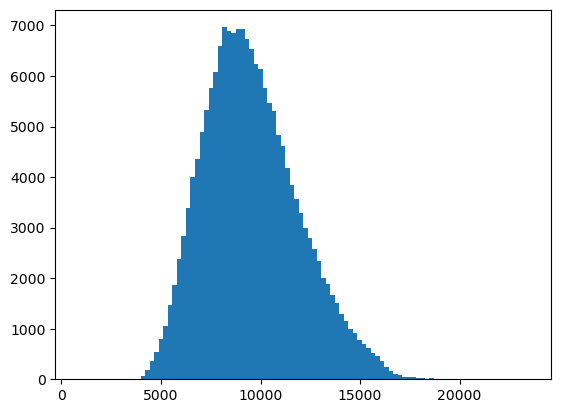

In [6]:
plt.hist(g.get_field("Masses"), bins=100)

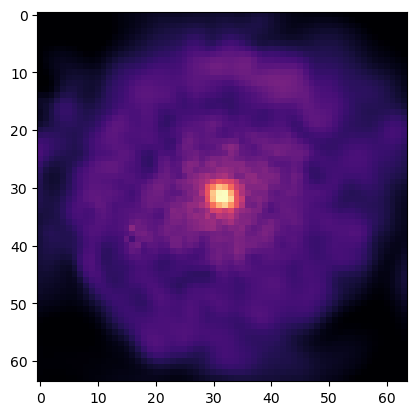

In [13]:
img = g.get_image(field = "GFM_Metallicity", normed=True, mass_weighted=True, res=64, plotfactor=5, lower = 0.05)
plt.imshow(img,cmap = "magma")

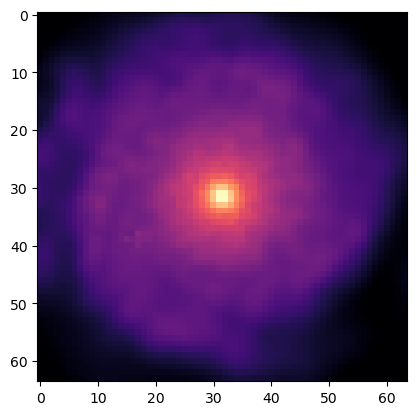

In [14]:
img = g.get_image(field = "Masses", normed=True, mass_weighted=True, res=64, plotfactor=5, lower = 0.05)
plt.imshow(img,cmap = "magma")

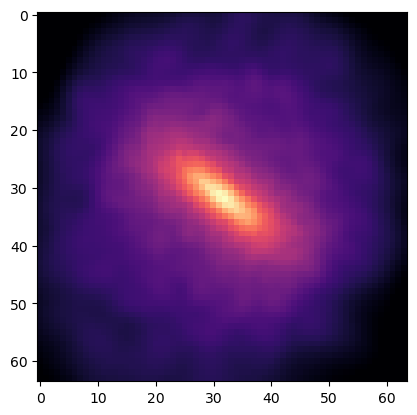

In [8]:
g = Galaxy(simulation="IllustrisTNG", halo_id=30, particle_type="stars", base_path=basePath, snapshot=99)
img = g.get_image(field = "Masses", normed=True, mass_weighted=False, res=64, plotfactor=5, lower = 0.05)
plt.imshow(img,cmap = "magma")

In [1]:
from galaxy import Galaxy
import matplotlib.pyplot as plt
import numpy as np
basePath = f"/export/data/ucakir/TNG100/TNG100-1/output/"

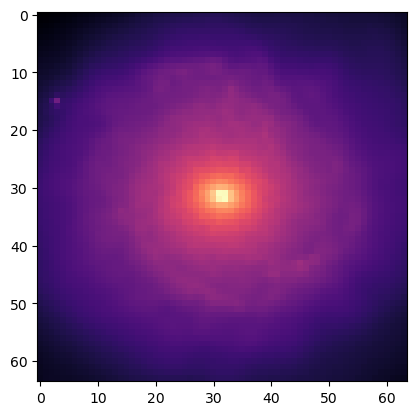

In [4]:
g = Galaxy(simulation="IllustrisTNG", halo_id=4, particle_type="stars", base_path=basePath, snapshot=99)
img = g.get_image(field = "Masses", normed=False, mass_weighted=True, res=64, plotfactor=5, lower = 0.05)
plt.imshow(np.log10(img),cmap = "magma")

In [3]:
h = np.load("/export/home/ucakir/galaxy-morphology/experiments/h.npy")

In [4]:
masses = np.load("/export/home/ucakir/galaxy-morphology/experiments/masses.npy")

In [5]:
coords = np.load("/export/home/ucakir/galaxy-morphology/experiments/coords.npy")

/tmp/ipykernel_1440194/888408716.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(hist[0]), cmap="magma")


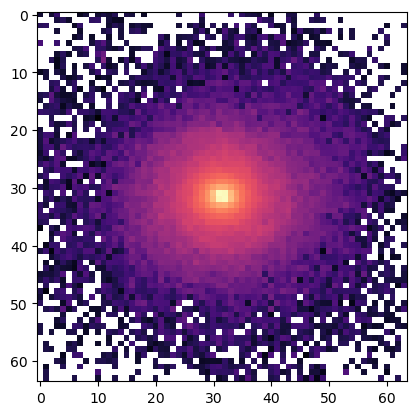

In [6]:
hist = np.histogram2d(coords[:,0], coords[:,1], bins=64, weights=masses[g.real_star_mask], range = ((-10*g.halfmassrad, 10*g.halfmassrad), (-10*g.halfmassrad, 10*g.halfmassrad)))
plt.imshow(np.log10(hist[0]), cmap="magma")

/tmp/ipykernel_1440194/784449388.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(hist2[0]), cmap="magma")


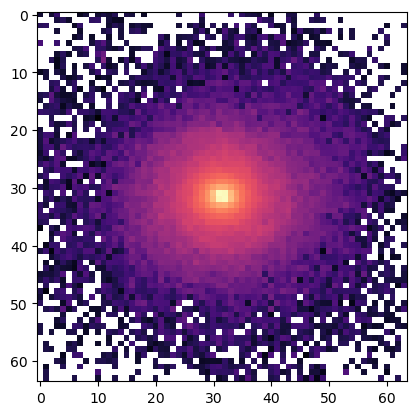

In [7]:
hist2 = np.histogram2d(g.coordinates[:,0], g.coordinates[:,1], bins=64, weights=g.particle_masses, range = ((-10*g.halfmassrad, 10*g.halfmassrad), (-10*g.halfmassrad, 10*g.halfmassrad)))
plt.imshow(np.log10(hist2[0]), cmap="magma")

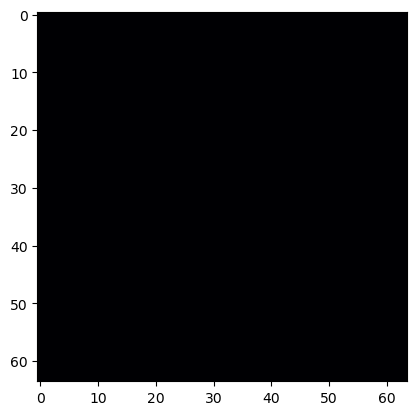

In [8]:
plt.imshow(hist[0]-hist2[0], cmap="magma")

In [16]:
from swiftsimio.visualisation.projection import scatter as scatter2D
def image2D(coordinates, R_half, weights, smoothing_length, plot_factor = 10, res = 64):
    ''' Image Render Module for 2D images.
    
    This function renders a 2D image of the given field. The image is rendered using the scatter2D function from the swiftsimio.visualisation.projection module.
    The image is rendered in the xy-plane. The image is calculated in plot_factor*R_half. The image is res x res pixels.
    
    Parameters
    ----------
    coordinates : numpy.array
        The coordinates of the particles. The Galaxy should be centered at the origin and already rotated to the xy-plane
    R_half : float
        The half mass radius of the galaxy used to set the plot range.
    weights : numpy.array
        The weights of the particles. This is the field that is rendered.
    smoothing_length : numpy.array
        The smoothing length of the particles used for the SPH kernel.    
    plot_factor : float
        The factor by which the image is zoomed in. The image is calculated for -plot_factor*R_half < x < plot_factor*R_half
    res : int
        The resolution of the image. The image is res x res pixels. The default is 64. 

    Returns
    -------
    numpy.array
        The rendered image.
    
    '''
    
    plot_range = plot_factor*R_half
    
    x = coordinates[:,0].copy()
    y = coordinates[:,1].copy()
    
    m =  weights
    
    h = smoothing_length.copy()
    
    #Transform Particles s.t -factor*r_halfmassrad < x <factor*r_halfmassrad -> 0 < x <1
    x = x/(2*plot_range) +1/2  
    y = y/(2*plot_range) +1/2

    h = h/(2*plot_range)
    
    SPH_hist = scatter2D(x=x, y = y,h = h, m = m ,res= res)
        
    return(SPH_hist)

In [24]:
img1 = image2D(coordinates=g.coordinates, R_half=g.halfmassrad, weights=g.particle_masses, smoothing_length=g.smoothing_length, plot_factor=10, res=64)
img2 = image2D(coordinates=coords, R_half=g.halfmassrad, weights=masses[g.real_star_mask], smoothing_length=h, plot_factor=10, res=64)



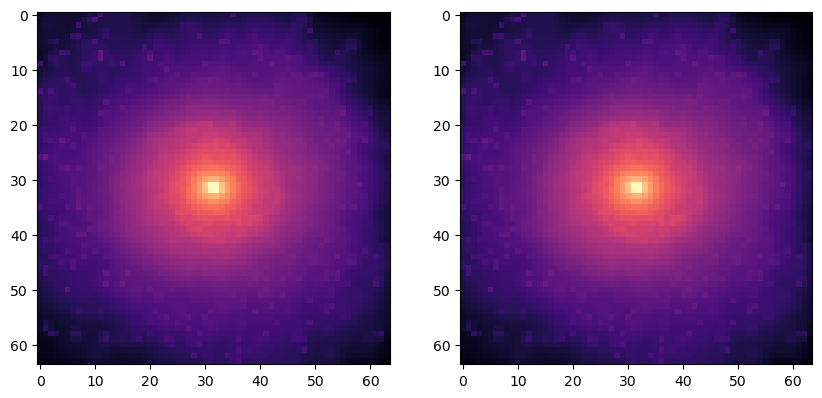

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(np.log10(img1), cmap="magma")
ax[1].imshow(np.log10(img2), cmap="magma")


In [13]:
def viz_image2D(coordinates, R_half, weights, smoothing_length, normed = False, plot_factor = 1.5, res = 128):
    
    plot_range = plot_factor*R_half
    
    x = coordinates[:,0].copy()
    y = coordinates[:,1].copy()
    
    m =  weights
    
    h = smoothing_length.copy()
    
    #Transform Particles s.t -factor*r_halfmassrad < x <factor*r_halfmassrad -> 0 < x <1
    x = x/(2*plot_range) +1/2  
    y = y/(2*plot_range) +1/2

    h = h/(2*plot_range)
    
    SPH_hist = scatter2D(x=x, y = y,h = h, m = m ,res= res)
    if normed:
        SPH_hist = SPH_hist-SPH_hist.min()
        SPH_hist = SPH_hist/SPH_hist.max()
        
    return(SPH_hist)


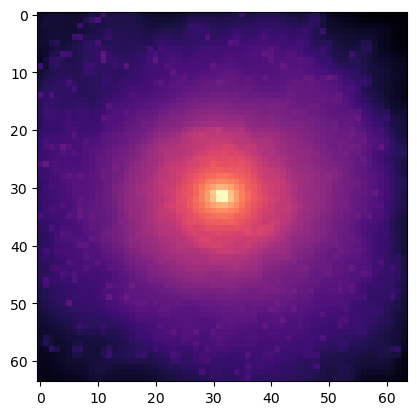

In [59]:
plt.imshow(np.log10(img2), cmap="magma")

In [14]:
img1_viz = viz_image2D(coordinates=g.coordinates, R_half=g.halfmassrad, weights=g.particle_masses, smoothing_length=g.smoothing_length, plot_factor=10, res=64)
img2_viz = viz_image2D(coordinates=coords, R_half=g.halfmassrad, weights=masses[g.real_star_mask], smoothing_length=h, plot_factor=10, res=64)


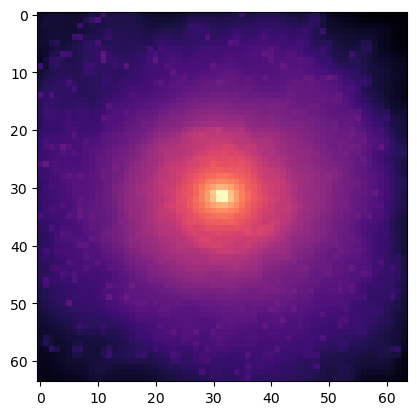

In [15]:
plt.imshow(np.log10(img1_viz), cmap="magma")

In [4]:
import sys
sys.path.insert(0, "/export/home/ucakir/galaxy-morphology/experiments")
import h5py
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go

import os
import visualization as viz

import illustris_python as il
from sklearn.decomposition import PCA
from tqdm import tqdm

print("start")


DATAPATH = "./data"




def norm(x, takelog = True, plusone = True, clip = True, lower = 0.1, upper = 1.):
    x = np.nan_to_num(x)
    x = x+1 if plusone else x
    mask = np.where(x!=0)
    
    x[mask] = np.log10(x[mask]) if takelog else x[mask]
    
    x[mask] = viz.clip_hist(x[mask], lower = lower, upper = upper) if clip else x[mask]
    
    
    x[mask] -= x[mask].min()
    x[mask]/=x[mask].max()
    return(x)


#------------ das hier öndern



#------



from astropy.cosmology import Planck15 as cosmo

def scale_to_physical_units(x, field):
    '''get rid of the Illustris units.'''

    if field == 'Masses':
        return x * 1e10 / (cosmo.H(0).value)

    elif field == 'Coordinates':
        return x / (cosmo.H(0).value)

    elif field == 'SubfindHsml':
        return x / (cosmo.H(0).value)

    elif field == 'SubfindDensity':
        return x * 1e10 * (cosmo.H(0).value) * (cosmo.H(0).value)

    elif field == 'GFM_StellarFormationTime':
        #Calculates Age of Stars
        return (cosmo.age(0).value-cosmo.age(1 / x - 1).value)*1e9 #Gyr

    else:
        return x



class illustrisData():
    
    def __init__(self,halo_id, particle_type = "stars",simulation = "TNG100-1",snapshot = 99):
        
        self.basePath = f"/export/data/ucakir/TNG100/{simulation}/output/"
        self.halo_id = halo_id
        self.particle_type = "stars"
        self.snapshot_number = snapshot
        
        self.rotated_flag = 0
        self.gas_flag=False
        self.gas = 0
        
        self.PartTypeDict = {"gas": 0, "dm": 1, "Tracers": 3, "stars": 4 , "bh": 5}
        
        self.mass_weighted_image = 0
        self.vertical_flag = 0
        
        self.load_data(self.halo_id)
        
        
        
    def load_data(self, halo_id):
        
        self.get_subhalo(halo_id = halo_id)
        self.get_particle_data(halo_id = halo_id)
         
          
    def get_subhalo(self, halo_id):
        
        self.subhalo = il.groupcat.loadSingle(self.basePath, self.snapshot_number,subhaloID =halo_id)
        
        
        self.center = self.subhalo["SubhaloPos"]
        self.mass = self.subhalo["SubhaloMassType"][self.PartTypeDict[self.particle_type]]*1e10
        self.halfmassrad = self.subhalo["SubhaloHalfmassRadType"][self.PartTypeDict[self.particle_type]]
        self.halfmassrad_DM = self.subhalo["SubhaloHalfmassRadType"][self.PartTypeDict["dm"]] 
    
    
    
    #data Path als Variable später
       
    def get_particle_data(self,halo_id):
        print("loading data.")
        self.stars = il.snapshot.loadSubhalo(self.basePath, self.snapshot_number, self.halo_id, "stars")
    
        #Here We need to create a mask to filter out wind phase gas cells (Stellar Formation time Negative)
        self.real_star_mask = np.where(self.stars["GFM_StellarFormationTime"]>0)[0]
        #self.gas = il.snapshot.loadSubhalo(self.basePath, self.snapshot_number, self.halo_id, "gas") SOME GALAXIES HAVE TO MUCH GAS PARTICLES, PROCESS GETS KILLED
   
        print("finished.")
         
    def face_on(self):
        # Das hier kann man später verallgemeinern
        if self.rotated_flag: return self.particles
        self.rotated_flag = 1
        inertia_tensor = viz.momentOfIntertia(stars = self.stars, gas = self.gas, rHalf=self.halfmassrad, subhalo_pos= self.center, gas_flag = self.gas_flag)
        rotation_matrix = viz.rotationMatrix(inertiaTenor=inertia_tensor, return_value = "face-on")
        
        pos = self.stars["Coordinates"]- self.center
        rot_pos =np.dot(rotation_matrix, pos.transpose()).transpose()
        self.particles = np.asarray(rot_pos)
        return(self.particles)

    
    def calc_rot_mat_around_z(self,angle):
        '''
        Calculates Rotation Matrix around z-axis, with input angle in rad.
        '''
        rot_mat = np.array([[np.cos(angle),-np.sin(angle),0],
                           [np.sin(angle), np.cos(angle),0],
                           [0 , 0, 1]])
        return(rot_mat)
    
    def get_angle(self,hist):
        #maybe überflüssig
        #angle in rad
        fit=PCA(n_components=2).fit(np.argwhere(hist>=np.quantile(hist,.75)))
        return np.arctan2(*fit.components_[0])
    
    
    def vertical(self, hist):
        #maybe überflüssig --> Später improven indem man das über moment of inertia tensor berechnet
        if self.vertical_flag == 1: return
        img = hist.copy()
        img = viz.clip_hist(img, lower =.9, upper = 1)
        angle = self.get_angle(img)
        vertical_rotation_matrix = self.calc_rot_mat_around_z(-angle)
        position = self.particles.copy()
        vertical_postion =np.dot(vertical_rotation_matrix, position.transpose()).transpose()
        
        
        
        self.particles = vertical_postion[self.real_star_mask]
        self.vertical_flag = 1
        
    
    
    def _rotated_image(self, weight_values,use_halfmass_rad="rmax_circ"):
        if use_halfmass_rad=="rmax_circ":
            halfmassrad = get_rmax(self.halo_id, rmax="circ")
           
        elif use_halfmass_rad=="rmax_ellip":
            halfmassrad = get_rmax(self.halo_id, rmax="ellip")
        elif use_halfmass_rad=="DM":
            halfmassrad= self.halfmassrad_DM
        else:
            halfmassrad=self.halfmassrad

        halfmassrad = self.halfmassrad_DM if use_halfmass_rad=="DM" else self.halfmassrad
        #Das hier improven: Ich müsste die vertical rotation auch direkt über moment of inertia Tensor berechnen können
        img = viz.image2D(coordinates = self.particles, R_half = halfmassrad, 
                                weights=weight_values, smoothing_length=self.h, normed = False,plot_factor=self.plot_factor, res =self.res)
            
            
        self.vertical(img)
            
        img = viz.image2D(coordinates = self.particles, R_half = halfmassrad, 
                                weights=weight_values, smoothing_length=self.h, normed = False,plot_factor=self.plot_factor, res =self.res)  
        return(img)
        
    def _weighted_image2D(self, weights = "Masses", use_halfmass_rad="rmax_circ"):
        if weights == "Masses":
            weight_values = scale_to_physical_units(self.stars["Masses"][self.real_star_mask],"Masses" )
            
        else:
            weight_values = scale_to_physical_units(self.stars["Masses"][self.real_star_mask],"Masses" )*scale_to_physical_units(self.stars[weights][self.real_star_mask],weights)
        
        
        img = self._rotated_image(weight_values=weight_values, use_halfmass_rad=use_halfmass_rad)
        return(img)
   
    
    
    
    def image2D(self, weights = "Masses", plot_factor = 2, res = 64, normed = False, return_hist = False, show_plot = False, use_halfmass_rad = "rmax_circ", **kwargs):
        if self.stars["count"] ==0:
            print("No stars Particles to create image.")
            return 0
        
        if not self.rotated_flag: self.face_on()
        
        self.plot_factor = plot_factor
        self.res = res
        self.h = scale_to_physical_units(self.stars["StellarHsml"], "StellarHsml")[self.real_star_mask]
        #self.h = self.stars["StellarHsml"][self.real_star_mask]
        mass_img = self._weighted_image2D(weights = "Masses", use_halfmass_rad=use_halfmass_rad)
        
        if weights == "Masses":
            img = mass_img
            
        elif weights == "GFM_Metallicity":
            # For Metallicity, calculate mass*metalicity weighted map to get metall mass per pixel
            img = self._weighted_image2D(weights = weights, use_halfmass_rad=use_halfmass_rad)
        else:
            weighted = self._weighted_image2D(weights = weights, use_halfmass_rad=use_halfmass_rad)
            img = weighted.copy() #do I need .copy here?
            mask = np.where(mass_img !=0)
            img[mask] = weighted[mask]/mass_img[mask]
        
        
        if normed:
            img = norm(img, **kwargs)


        if show_plot: plt.imshow(img, cmap = "magma")
        if return_hist: return(img)

        
        
        
    

    
    
    


start


loading data.
finished.


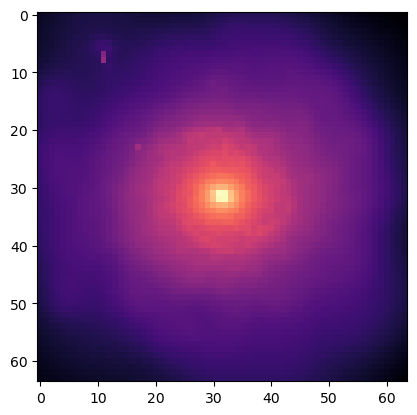

In [15]:
x = illustrisData(4)
img = x.image2D(return_hist = True,res = 64, normed = False, plot_factor=10, weights = "Masses", use_halfmass_rad="None")
plt.imshow(np.log10(img), cmap = "magma")

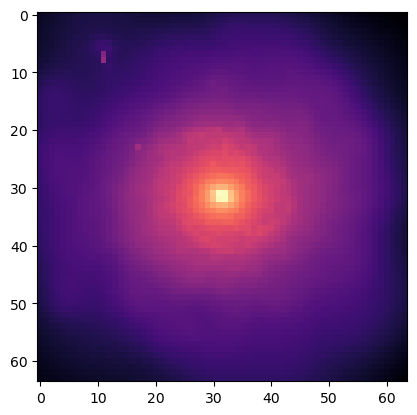

In [20]:
coords = x.particles
masses = scale_to_physical_units(x.stars["Masses"][x.real_star_mask],"Masses" )
r_half = x.halfmassrad
img = image2D(coordinates = coords, R_half = r_half, weights=masses, smoothing_length=x.h,plot_factor=10, res =64)
plt.imshow(np.log10(img), cmap = "magma")

In [25]:
np.equal(g.smoothing_length, x.h).all()

ValueError: operands could not be broadcast together with shapes (142668,) (142662,) 

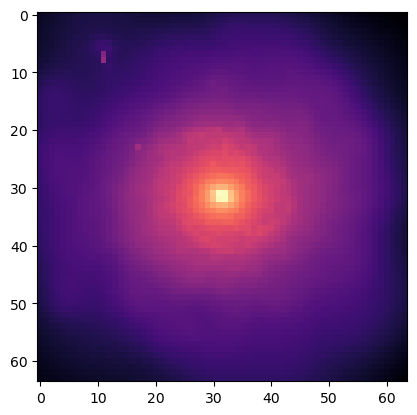

In [26]:
img2 = image2D(coordinates = coords, R_half = r_half, weights=masses, smoothing_length=g.smoothing_length[g.real_star_mask],plot_factor=10, res =64)
plt.imshow(np.log10(img2), cmap = "magma")